# 📚 Create a Dashboard from a SQL Database

This exercise demonstrates a complete data analysis and visualization workflow using Python. We will analyze the State of Delaware's P-Card (Purchase Card) transactions from a SQLite database. The process involves:

1. Connecting to the database and loading data using pandas and Python's built-in `sqlite3` module.
2. Querying and aggregating the data using SQL to extract meaningful insights.
3. Creating interactive data visualizations using `plotly`.
4. Building and launching a web-based, interactive dashboard to present the findings using dash.

## ⚙️ 1. Install and Import Packages

- `sqlite3`: A a small, fast, self-contained SQL database engine. The `sqlite3` module provides a SQL interface for Python.
- `pandas`: An open-source data analysis and manipulation tool
- `plotly`: A graphing library that makes interactive, publication-quality graphs. It allows for the creation of a wide range of chart types.
- `dash`: A Python framework for building analytical web applications, no JavaScript required. It's built on top of Plotly.js, React, and Flask and is ideal for creating dashboards with custom user interfaces.

First, ensure the relevant Python packages are installed. This exercises uses specific versions to guarantee compatibility.

In [20]:
## Remove the comment character (#) and execute this cell if you need to install the packages

# %pip install "plotly>=6,<7"
# %pip install "dash>=3,<4"
# %pip install "anywidget"

Next, import the libraries we'll use throughout the analysis.

In [2]:
import pandas as pd
import sqlite3
import plotly
import plotly.express as px
import dash

Print the package versions to confirm everything is set up correctly.

In [3]:
print(f"plotly version == {plotly.__version__}")
print(f"dash version == {dash.__version__}")
print(f"anywidget version == {dash.__version__}")

plotly version == 6.1.1
dash version == 3.2.0
anywidget version == 3.2.0


## 🔍 2. Load and Explore the Data

We connect to the `data/delaware-pcard-transactions.db` SQLite database and load the entire transactions table into a pandas DataFrame. This gives us an initial look at the structure and content of the data.

In [4]:
conn = sqlite3.connect("data/delaware-pcard-transactions.db")

df = pd.read_sql("SELECT * FROM transactions;", conn)
display(df)

conn.close()

,fiscal_year,fiscal_period,department,division,merchant,category_description,transaction_date,amount
0,2024,4,LEGAL,PUBLIC DEFENDER,UBER TRIP,Travel,2023-10-15,44.34
1,2024,1,JUDICIAL,Superior Court,KALAHARI RESORT - PA,Lodging,2023-07-07,129.00
2,2024,1,JUDICIAL,Superior Court,KALAHARI RESORT - PA ECOM,Lodging,2023-07-06,129.00
3,2024,1,JUDICIAL,Superior Court,AMZN MKTP US*QP9714763,Book Stores,2023-07-09,99.99
4,2024,1,JUDICIAL,Superior Court,KALAHARI RESORT - PA,Lodging,2023-06-30,421.83
...,...,...,...,...,...,...,...,...
195561,2024,12,FREIRE CHARTER SCHOOL,Freire Charter School,DELAWARE ZOOLOGICAL SO,Organizations Charitable And Social Services,2024-06-04,50.00
195562,2024,12,FREIRE CHARTER SCHOOL,Freire Charter School,CVS/PHARMACY #00088,Drug Stores Pharmacies,2024-06-05,13.98
195563,2024,12,FREIRE CHARTER SCHOOL,Freire Charter School,AMZN MKTP US*TB9F62GA3,Book Stores,2024-06-05,42.52
195564,2024,12,FREIRE CHARTER SCHOOL,Freire Charter School,FULTON PAPER And PARTY SUPP,Miscellaneous And Specialty Retail Stores,2024-06-03,987.00


## 📈 3. Data Analysis and Visualization

In this section, we perform several SQL queries to aggregate the data and then use Plotly to visualize the results.

### 3.1. Total Number of Transactions

In [5]:
conn = sqlite3.connect("data/delaware-pcard-transactions.db")

df_num_rows = pd.read_sql("SELECT COUNT(*) AS num_rows FROM transactions;", conn)
display(df_num_rows)

conn.close()

,num_rows
0,195566


### 3.2. Top 10 Departments by Spending

We query the database to find the top 10 departments by total spending (`amount`). We group the data by `department`, calculate the sum of spending and the count of transactions, and sort the results to get the highest spenders.

In [6]:
conn = sqlite3.connect("data/delaware-pcard-transactions.db")

df_top_10_departments = pd.read_sql("""
    SELECT 
        department, 
        SUM(amount) AS total_spent,
        COUNT(*) AS num_transactions
    FROM transactions
    GROUP BY department
    ORDER BY total_spent DESC
    LIMIT 10;
""", conn)
display(df)

conn.close()

,fiscal_year,fiscal_period,department,division,merchant,category_description,transaction_date,amount
0,2024,4,LEGAL,PUBLIC DEFENDER,UBER TRIP,Travel,2023-10-15,44.34
1,2024,1,JUDICIAL,Superior Court,KALAHARI RESORT - PA,Lodging,2023-07-07,129.00
2,2024,1,JUDICIAL,Superior Court,KALAHARI RESORT - PA ECOM,Lodging,2023-07-06,129.00
3,2024,1,JUDICIAL,Superior Court,AMZN MKTP US*QP9714763,Book Stores,2023-07-09,99.99
4,2024,1,JUDICIAL,Superior Court,KALAHARI RESORT - PA,Lodging,2023-06-30,421.83
...,...,...,...,...,...,...,...,...
195561,2024,12,FREIRE CHARTER SCHOOL,Freire Charter School,DELAWARE ZOOLOGICAL SO,Organizations Charitable And Social Services,2024-06-04,50.00
195562,2024,12,FREIRE CHARTER SCHOOL,Freire Charter School,CVS/PHARMACY #00088,Drug Stores Pharmacies,2024-06-05,13.98
195563,2024,12,FREIRE CHARTER SCHOOL,Freire Charter School,AMZN MKTP US*TB9F62GA3,Book Stores,2024-06-05,42.52
195564,2024,12,FREIRE CHARTER SCHOOL,Freire Charter School,FULTON PAPER And PARTY SUPP,Miscellaneous And Specialty Retail Stores,2024-06-03,987.00


Visualize the output as a horizontal bar chart, which makes it easy to compare the spending levels across these top departments.

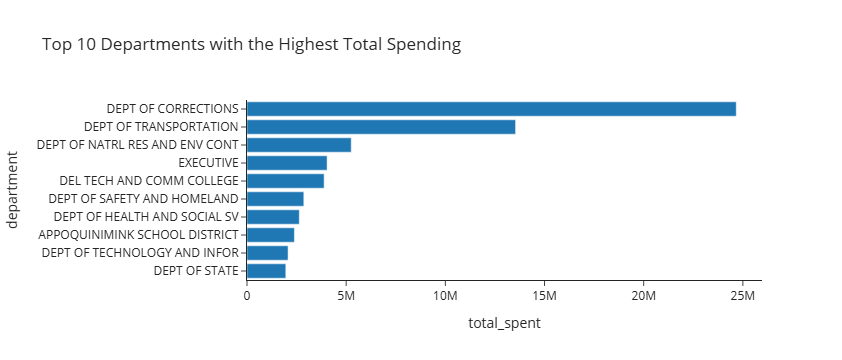

In [7]:
fig_top_10_departments = px.bar(
    df_top_10_departments.iloc[::-1],
    x="total_spent",
    y="department",
    template="simple_white",
    title="Top 10 Departments with the Highest Total Spending",
)

fig_top_10_departments.show()

### 3.3. Monthly Spending Comparison

Here, we focus on two specific departments: 'DEPT OF CORRECTIONS' and 'DEPT OF TRANSPORTATION'. The SQL query extracts their monthly spending totals. The strftime function is used to group transactions by month.

In [8]:
conn = sqlite3.connect("data/delaware-pcard-transactions.db")

df_monthly_summary = pd.read_sql("""
    SELECT 
        department,
        strftime('%Y-%m', transaction_date) AS year_month,
        COUNT(*) AS transaction_count,
        CAST(SUM(amount) AS INTEGER) AS total_amount
    FROM transactions
    WHERE department IN ('DEPT OF CORRECTIONS', 'DEPT OF TRANSPORTATION')
    GROUP BY department, year_month
    ORDER BY department, year_month;
""", conn)
display(df_monthly_summary.head(5))

conn.close()

,department,year_month,transaction_count,total_amount
0,DEPT OF CORRECTIONS,2023-06,312,634057
1,DEPT OF CORRECTIONS,2023-07,1230,1492804
2,DEPT OF CORRECTIONS,2023-08,1762,1878673
3,DEPT OF CORRECTIONS,2023-09,1445,1958220
4,DEPT OF CORRECTIONS,2023-10,1384,2056101


Visualize this data using a grouped bar chart, allowing for a direct comparison of monthly spending between the two departments over time.

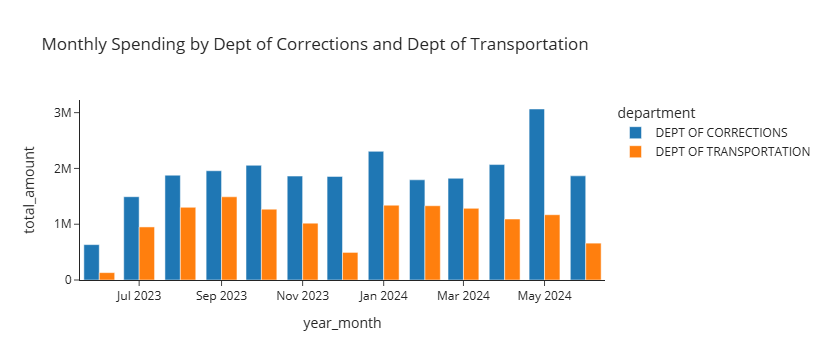

In [9]:
fig_monthly_summary = px.bar(
    df_monthly_summary,
    x="year_month",
    y="total_amount",
    barmode="group",
    color="department",
    template="simple_white",
    title="Monthly Spending by Dept of Corrections and Dept of Transportation",
)

fig_monthly_summary.show()

### 3.4. Top 20 Merchants by Transaction Volume

To understand which merchants are most frequently used, we query the data for the top 20 merchants based on the total number of transactions. We also calculate the total and average transaction amounts for each.

In [10]:
conn = sqlite3.connect("data/delaware-pcard-transactions.db")

df_top_20_merchant_summary = pd.read_sql("""
    SELECT 
        merchant,
        COUNT(*) AS transaction_count,
        ROUND(SUM(amount), 1) AS total_amount,
        ROUND(AVG(amount), 1) AS average_amount
    FROM transactions
    GROUP BY merchant
    ORDER BY transaction_count DESC
    LIMIT 20;
""", conn)
display(df_top_20_merchant_summary)

conn.close()

,merchant,transaction_count,total_amount,average_amount
0,GRAINGER,3930,1247400.6,317.4
1,VERIZONWRLSS*RTCCR VB,2862,2086234.4,728.9
2,UBER TRIP,2479,63692.8,25.7
3,EASTERN SHORE COFFEE And WA,2022,168660.4,83.4
4,WALMART.COM,1978,257352.1,130.1
5,DSCYF CRIMINAL HIST,1254,62762.0,50.0
6,DMI* DELL K-12/GOVT,1164,1659849.2,1426.0
7,INTERNATIONAL TRANSACTION,1036,6686.8,6.5
8,COL PRKNG JSTCE CTR Q08,986,8141.0,8.3
9,DLTCRP BACKGROUND CHECK,954,23850.0,25.0


### 3.5. Monthly Spending Trends for Top 5 Merchants

This more advanced query first identifies the five merchants with the highest number of transactions (using a Common Table Expression, or `WITH` clause) and then calculates the total monthly spending for each of them.

In [11]:
conn = sqlite3.connect("data/delaware-pcard-transactions.db")

df_top_5_merchants_monthly_summary = pd.read_sql("""
    -- Step 1: Identify the top 5 merchants by number of transactions
    WITH top_5_vendors AS (
        SELECT
            merchant,
            COUNT(amount) AS num_transactions
        FROM transactions
        WHERE amount > 0
        GROUP BY merchant
        ORDER BY num_transactions DESC
        LIMIT 5
    )
    -- Step 2: Generate the monthly summary ONLY for these filtered merchants
    SELECT
        t.merchant,
        strftime('%Y-%m', t.transaction_date) AS year_month,
        COUNT(*) AS transaction_count,
        CAST(SUM(t.amount) AS INTEGER) AS total_amount
    FROM transactions t
    JOIN top_5_vendors tv ON t.merchant = tv.merchant
    GROUP BY t.merchant, year_month
    ORDER BY 
        t.merchant,
        year_month;
""", conn)
display(df_top_5_merchants_monthly_summary)

conn.close()

,merchant,year_month,transaction_count,total_amount
0,EASTERN SHORE COFFEE And WA,2023-06,12,274
1,EASTERN SHORE COFFEE And WA,2023-07,173,11798
2,EASTERN SHORE COFFEE And WA,2023-08,185,11321
3,EASTERN SHORE COFFEE And WA,2023-09,161,11336
4,EASTERN SHORE COFFEE And WA,2023-10,182,11879
...,...,...,...,...
60,WALMART.COM,2024-02,156,15828
61,WALMART.COM,2024-03,202,26009
62,WALMART.COM,2024-04,170,23810
63,WALMART.COM,2024-05,250,35458


A stacked bar chart shows how the spending for these top five merchants contributes to the total monthly amount, revealing spending patterns and dependencies.

In [12]:
fig_top_5_merchants_monthly_summary = px.bar(
    df_top_5_merchants_monthly_summary,
    x='year_month',
    y='total_amount',
    color='merchant',
    template="simple_white",
    title="Monthly Spending on Top 5 Merchants",
)

fig_top_5_merchants_monthly_summary.show()

## 🖥️ 4. Build the Interactive Dashboard

Finally, we use Dash to combine all our analyses into a single, interactive web application. We define a layout that includes a title, our Plotly figures (`dcc.Graph`), and a formatted data table (`dash_table.DataTable`) for the top 20 merchants.

⚠️ **Note**: This section requires a temporary web server to run on `localhost`. This works best in a local development environment (e.g., running Jupyter Notebook on your own machine). If you're using a cloud-based Jupyter environment (such as Google Colab or a cloud-hosted JupyterHub), the dashboard may not display correctly or at all, as these platforms often block access to local server ports. To fully experience the interactive dashboard, consider downloading the notebook and running it locally.

In [13]:
from dash import Dash, html, dash_table, dcc

app = Dash()

app.layout = [
    html.H1(children="State of Delaware P-Card Transactions Dashboard"),
    html.Hr(),
    dcc.Graph(figure=fig_top_10_departments),
    dcc.Graph(figure=fig_monthly_summary),
    html.Div(children="Top 20 Merchants Summary"),
    dash_table.DataTable(data=df_top_20_merchant_summary.to_dict("records"), page_size=10),
    dcc.Graph(figure=fig_top_5_merchants_monthly_summary),
]

if __name__ == '__main__':
    app.run(debug=True)

## 5. 🎉 Summary

This exercise demonstrates a streamlined process for transforming raw data in a database into an interactive dashboard. By leveraging the combined strengths of SQL for data querying, pandas for data manipulation, Plotly for visualization, and Dash for dashboard development, we can automate the reporting of key insights through a connected dashboard. In practice, you can link the dashboard to a live database to create a dynamic, always up-to-date reporting solution.